# Readme Info 

This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor

cjdata.PID: patient ID

cjdata.image: image data

cjdata.tumorBorder: a vector storing the coordinates of discrete points on tumor border.

		For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.
		It was generated by manually delineating the tumor border. So we can use it to generate
		binary image of tumor mask.
        
cjdata.tumorMask: a binary image with 1s indicating tumor region

Dataset Link: https://figshare.com/articles/brain_tumor_dataset/1512427

In [5]:
#Import libraries; updated retroactively

from PIL import Image
import scipy.io
import numpy as np
import h5py
from matplotlib import pyplot as plt

label: 2
tumor border vector coordinates: [[191.77700348 236.37630662 181.07317073 249.75609756 181.07317073
  267.59581882 184.64111498 275.62369338 198.91289199 284.54355401
  213.18466899 285.43554007 230.13240418 284.54355401 249.75609756
  280.08362369 254.21602787 267.59581882 254.21602787 255.10801394
  256.         247.97212544 268.48780488 249.75609756 273.83972125
  234.59233449 273.83972125 220.32055749 272.94773519 212.29268293
  267.59581882 206.04878049 257.78397213 203.3728223  248.8641115
  199.80487805 241.728223   200.69686411 241.728223   206.94076655
  242.62020906 214.07665505 244.40418118 221.21254355 250.64808362
  238.16027875 251.54006969 244.40418118 244.40418118 244.40418118
  231.91637631 236.37630662 217.6445993  231.02439024 203.3728223
  230.13240418]]


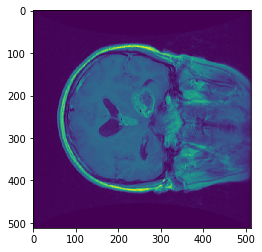

In [6]:
#Pull data for one file to examine

f = h5py.File('766.mat','r')
dset = f['cjdata']
image = np.array(dset['image'])
label = int(np.array(dset['label']).reshape(-1)[0])
t_border = np.array(dset['tumorBorder'])
t_mask = np.array(dset['tumorMask'])


print('label:',label)
print('tumor border vector coordinates:', t_border )

plt.imshow(image, interpolation='nearest')
plt.show()



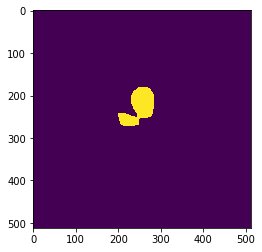

In [7]:
plt.imshow(t_mask, interpolation='nearest')
plt.show()

Image of scan with tumor location


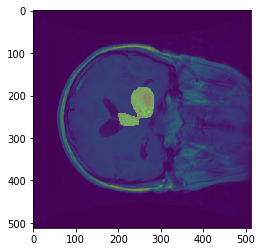

In [8]:
print('Image of scan with tumor location')

fig1 = plt.imshow(image, interpolation = 'nearest')
fig2 = plt.imshow(t_mask, interpolation='nearest', alpha = .4)


plt.show()

## Script for Extracting/Loading into Dataframe

In [2]:
import os, shutil

os.listdir()

['.ipynb_checkpoints',
 '766.mat',
 'brainTumorDataPublic_1-766',
 'brainTumorDataPublic_1533-2298',
 'brainTumorDataPublic_2299-3064',
 'brainTumorDataPublic_767-1532',
 'cvind.mat',
 'Data_Format-checkpoint.ipynb',
 'Data_Format.ipynb',
 'README.txt']

In [3]:
dir_list = ['brainTumorDataPublic_1-766', 'brainTumorDataPublic_1533-2298', 'brainTumorDataPublic_2299-3064', 'brainTumorDataPublic_767-1532']

for directory in dir_list:
    print(len(os.listdir(directory)))

766
766
766
766


There's a lot of data in every folder with 766 files. Let's extract one folder into a dataframe first.

In [40]:
data_list = []

for directory in dir_list:
    for file in os.listdir(directory):
        f = h5py.File(directory + '/' + file,'r')
        dset = f['cjdata']
        label = int(np.array(dset['label']).reshape(-1)[0])
        image = np.array(dset['image'])
        t_border = np.array(dset['tumorBorder'])
        t_mask = np.array(dset['tumorMask'])
        data_list.append([file, image, t_mask, t_border, label])



In [41]:
import pandas as pd

df = pd.DataFrame(data_list, columns = ['file_name', 'img_data', 't_mask', 't_border', 'label'])

In [42]:
print(df.shape)
df.head()

(3064, 5)


,file_name,img_data,t_mask,t_border,label
0,1.mat,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[267.6152450090744, 231.37568058076226, 277.8...",1
1,10.mat,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[248.86411149825784, 256.89198606271776, 238....",1
2,100.mat,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[193.26370732550265, 175.8076305348121, 185.1...",1
3,101.mat,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[203.01276563153144, 180.1240714671921, 187.0...",1
4,102.mat,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[264.1867350217663, 189.49842909271555, 253.6...",1
